In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

In [2]:
# Step 1: Data Acquisition
df = pd.read_csv("C:\\Users\\user\\Desktop\\Data Science\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Step 2: Exploratory Data Analysis
print(df.head())  # Display the first few rows
print(df.info())  # Get information about the dataset
print(df.describe())  # Summary statistic

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

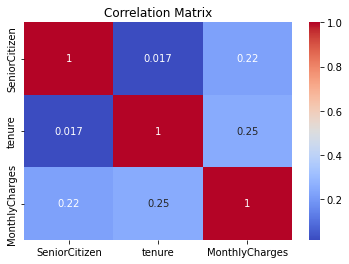

In [5]:
# Step 3: Statistical Analysis
correlation_matrix = df.corr()  # Calculate correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Visualize correlations
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Step 4: Predictive Modeling
# Prepare the data for modeling
X = df.drop('Churn', axis=1)  # Independent variables
y = df['Churn']  # Dependent variable

In [20]:
# One-hot encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))

In [21]:
# Drop the original categorical columns from X and concatenate the encoded features
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, X_encoded], axis=1)

In [22]:
# Step 4: Model Training
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# Step 5: Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

In [27]:
# Step 6: Reporting
report = """
--------------------------------------
          Customer Churn Report        
--------------------------------------

1. Dataset Information:
   - Number of samples: {}
   - Number of features: {}
   - Target variable: Churn

2. Exploratory Data Analysis:
   - Sample data:
     {}
   - Dataset summary:
     {}

3. Data Preprocessing:
   - One-hot encoded categorical variables.

4. Model Training:
   - Trained a logistic regression model to predict churn.
   - Model evaluation metrics:
     - Accuracy: {:.2f}
     - Precision: {:.2f}
     - Recall: {:.2f}
     - F1-score: {:.2f}

--------------------------------------
""".format(len(df), X.shape[1], df.head(), df.describe(), accuracy, precision, recall, f1)

# Print the report
print(report)


--------------------------------------
          Customer Churn Report        
--------------------------------------

1. Dataset Information:
   - Number of samples: 7043
   - Number of features: 13618
   - Target variable: Churn

2. Exploratory Data Analysis:
   - Sample data:
        customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2    